# Assignment 5:  Due 10/6

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [2]:
df = pd.read_csv('data/nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# 1c)

Show the first 5 listings of the dataset.

In [4]:
df[:5]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [5]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
df.isna().sum().sum()

1912

The total number of Null values in the DataFrame is 1912.

# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

<IPython.core.display.Javascript object>


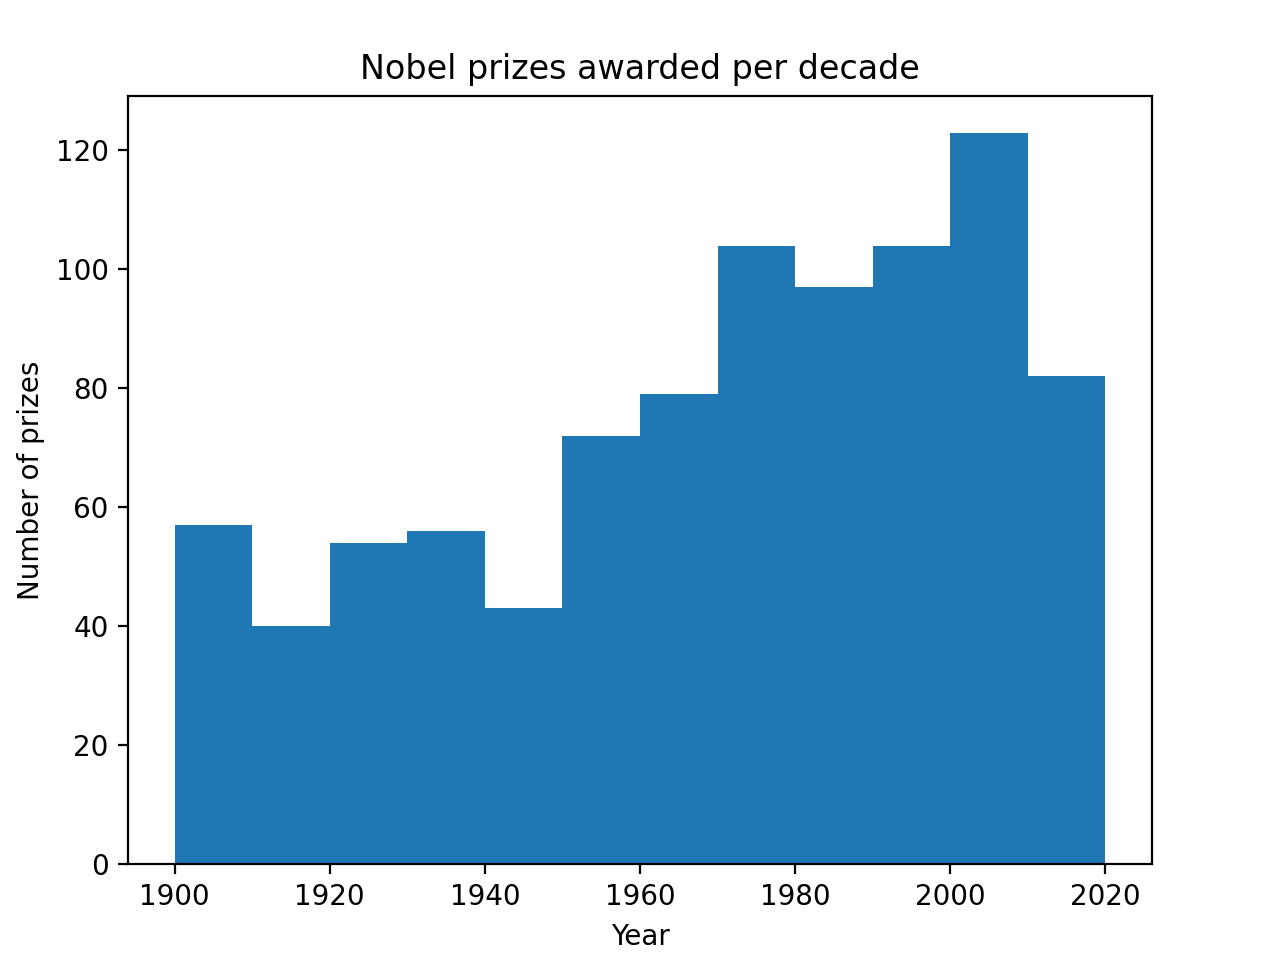

The least amount of Nobel prizes were awarded around the decade of 1910.


In [7]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlabel('Year')
axes.set_ylabel('Number of prizes')
axes.set_title('Nobel prizes awarded per decade')
decade_bins = [1900 + 10 * d for d in range(0, 13)]
y, x, _ = axes.hist(df.year, bins=decade_bins);
print(f'The least amount of Nobel prizes were awarded around the decade of {x[np.where(y == y.min())][0]}.')

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [8]:
bycat = df.groupby('category').count().year

In [9]:
bycat

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
Name: year, dtype: int64

In [10]:
bycat[bycat == bycat.max()]

category
Medicine    211
Name: year, dtype: int64

The medicine category has the most Nobel prizes.

# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [11]:
bypshare = df.groupby('prize_share').count().year

In [12]:
percentages = [bypshare[i] / bypshare.sum() for i in range(0, len(bypshare))]
for i, percentage in enumerate(percentages):
    print(f'1/{i+1} = {np.round(percentage * 100, 2)}%')

1/1 = 37.76%
1/2 = 33.59%
1/3 = 22.06%
1/4 = 6.59%


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [13]:
bysex = df.groupby('sex').count().year

In [14]:
bysex.sum(), df.count().year

(885, 911)

No, the sum of male and female prizes doesn't add up to the total entries because there are NaN values in the sex column.

<IPython.core.display.Javascript object>


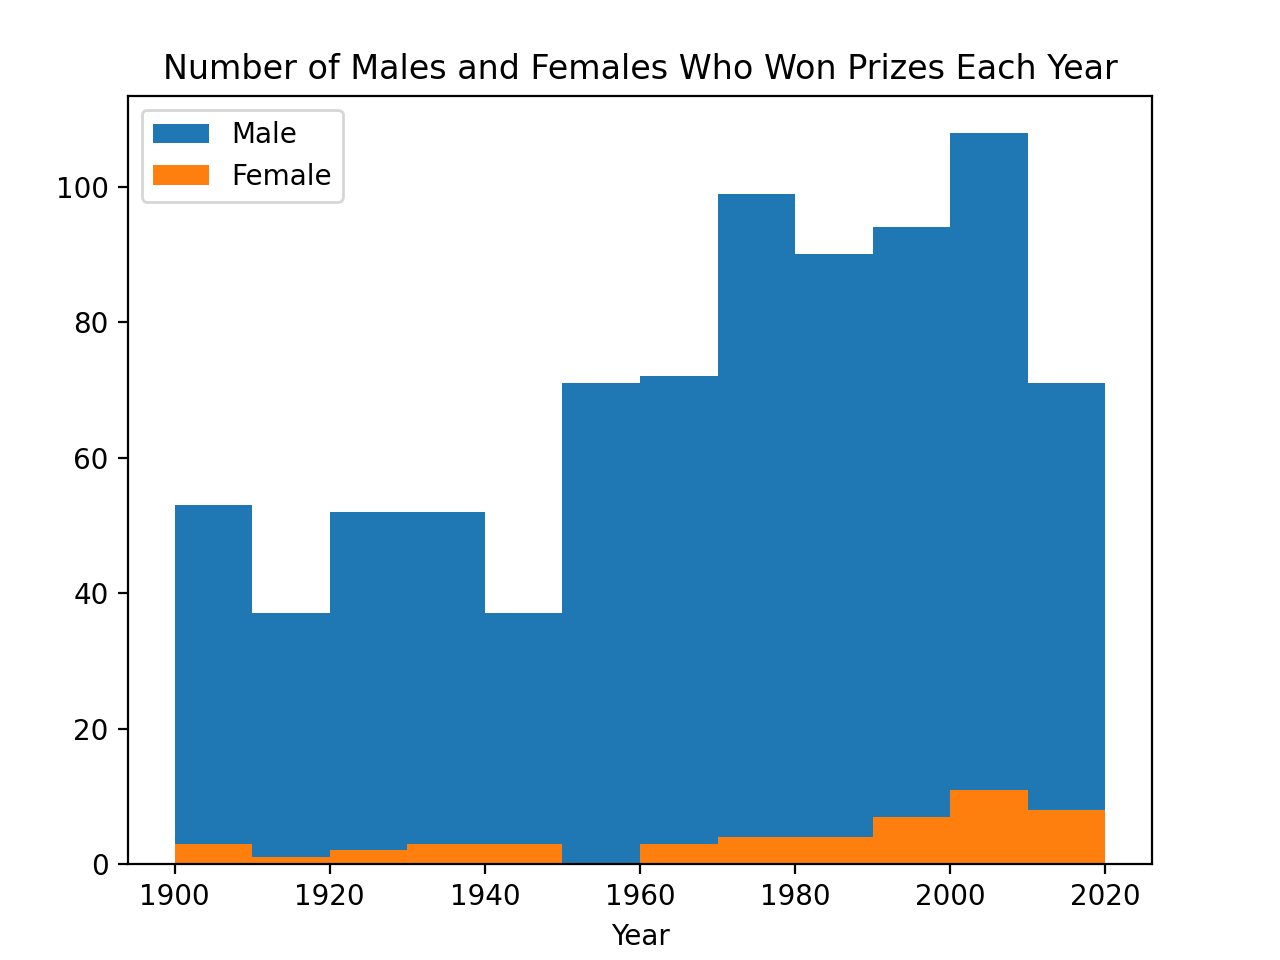

In [15]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.hist(df[df.sex == 'Male'].year, bins = decade_bins, label = 'Male')
axes.hist(df[df.sex == 'Female'].year, bins = decade_bins, label = 'Female')
axes.set_title('Number of Males and Females Who Won Prizes Each Year')
axes.set_xlabel('Year')
axes.legend();

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [16]:
countries = df.groupby('birth_country').count().year

In [17]:
countries[countries > 10]

birth_country
Austria                      14
Canada                       18
China                        11
Denmark                      11
France                       51
Germany                      61
Italy                        17
Japan                        24
Netherlands                  18
Norway                       12
Russia                       17
Sweden                       29
Switzerland                  16
United Kingdom               85
United States of America    259
Name: year, dtype: int64

In [18]:
countries['United States of America']

259

259 prizes were won by those whose birth country was United States of America.

# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [19]:
ages = pd.to_datetime(df.year, format='%Y') - pd.to_datetime(df.birth_date)
ages_year = ages / np.timedelta64(1, 'Y')
ages_year

0      48.337748
1      61.797299
2      46.799044
3      72.650362
4      78.619000
         ...    
906    70.892626
907    64.395573
908    81.280245
909    64.299746
910    72.529895
Length: 911, dtype: float64

In [20]:
youngest_age = min(ages_year)
oldest_age = max(ages_year)
youngest_age, oldest_age

(16.47398646104985, 89.3652847081049)

The age of the youngest prize winner is around 16 years old.
The age of the oldest prize winner is around 89 years old.

In [21]:
df.iloc[ages_year[ages_year == youngest_age].index].full_name

885    Malala Yousafzai
Name: full_name, dtype: object

In [22]:
df.iloc[ages_year[ages_year == oldest_age].index].full_name

793    Leonid Hurwicz
Name: full_name, dtype: object

The youngest prize winner is Malala Yousafzai.
The oldest prize winner is Leonid Hurwicz.

In [23]:
ages_year.describe()

count    883.000000
mean      58.942499
std       12.388824
min       16.473986
25%       49.650575
50%       59.491981
75%       68.212215
max       89.365285
dtype: float64

The mean age to win the prize is 59 years old.
The standard deviation to win the prize is 12.39.

<IPython.core.display.Javascript object>


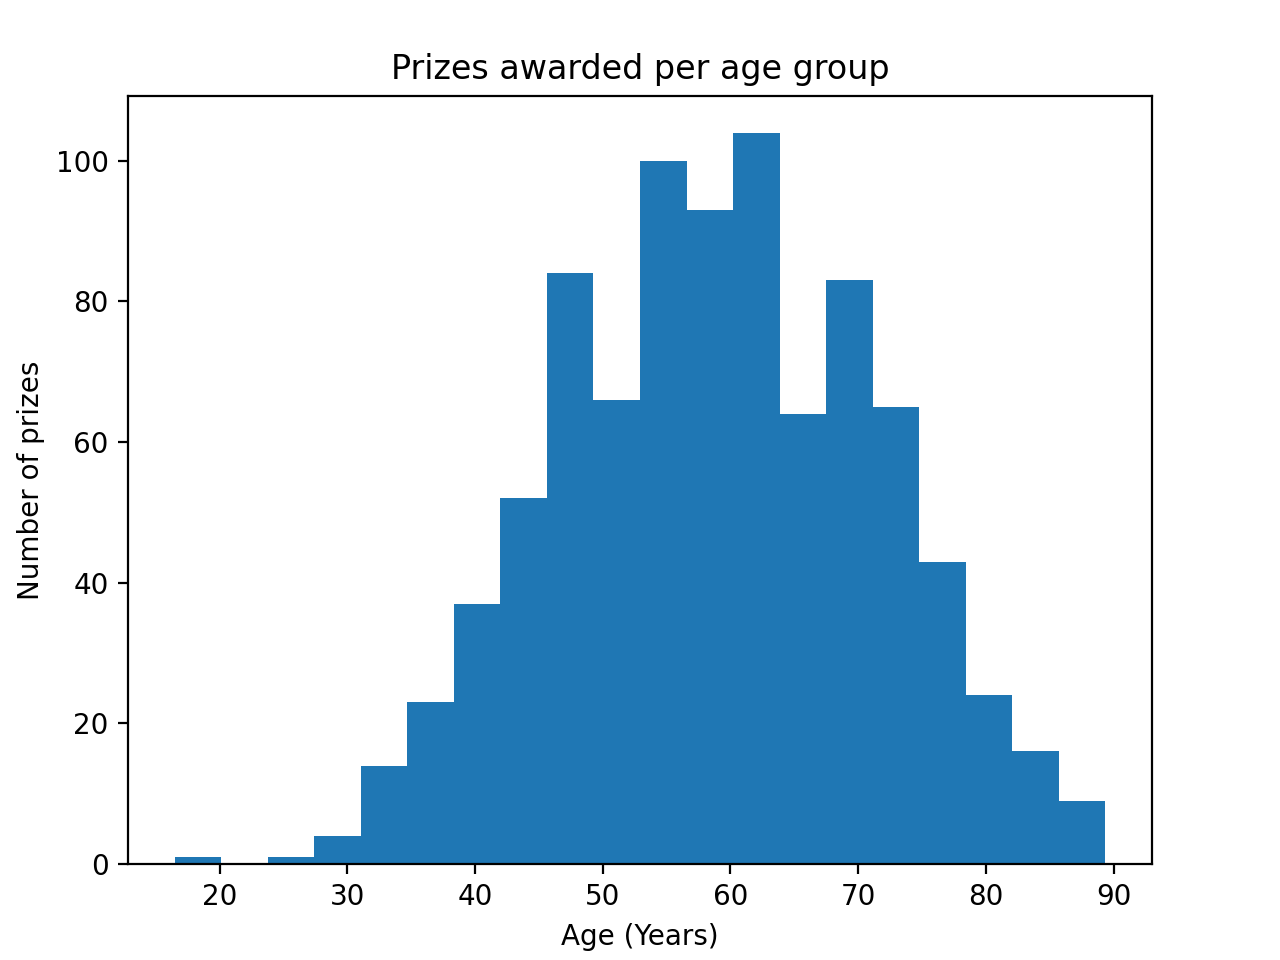

In [24]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Prizes awarded per age group')
axes.set_xlabel('Age (Years)')
axes.set_ylabel('Number of prizes')
axes.hist(ages_year, 20);

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [25]:
df_copy = df.copy()

In [26]:
df_copy.drop('laureate_id', axis=1, inplace=True)

In [27]:
df_copy.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [28]:
df_copy['age'] = ages_year

In [29]:
df_copy.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,48.337748
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,61.797299
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,46.799044
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,72.650362
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,78.619000


In [30]:
df_copy.age

0      48.337748
1      61.797299
2      46.799044
3      72.650362
4      78.619000
         ...    
906    70.892626
907    64.395573
908    81.280245
909    64.299746
910    72.529895
Name: age, Length: 911, dtype: float64